# Predicting WNBA 2025 Champions

In [10]:
# Importing the packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Reading in the data
df = pd.read_csv("WNBA 2024 Season Stats.csv")
df

,Rank,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,1,New York Liberty*,28.5,32,8,33,7,9.15,-1.09,8.06,...,0.422,0.561,0.521,14.2,25.1,0.203,0.476,14.5,79.2,0.167
1,2,Connecticut Sun*,28.9,28,12,31,9,6.50,-0.75,5.75,...,0.273,0.533,0.488,13.8,25.2,0.239,0.482,17.6,78.2,0.204
2,3,Minnesota Lynx*,27.9,30,10,30,10,6.38,-0.74,5.64,...,0.371,0.553,0.518,15.3,22.3,0.182,0.460,16.5,74.2,0.181
3,4,Las Vegas Aces*,29.6,27,13,29,11,5.48,-0.70,4.77,...,0.388,0.567,0.523,12.4,16.6,0.223,0.488,14.1,79.5,0.189
4,5,Seattle Storm*,29.1,25,15,27,13,4.48,-0.56,3.92,...,0.295,0.525,0.478,13.5,24.2,0.211,0.477,16.5,74.6,0.210
5,6,Indiana Fever*,25.5,20,20,16,24,-2.68,0.49,-2.19,...,0.377,0.559,0.523,15.7,24.6,0.194,0.507,12.8,76.7,0.228
6,7,Atlanta Dream*,27.7,15,25,15,25,-2.75,0.36,-2.39,...,0.285,0.501,0.452,14.0,25.4,0.227,0.488,14.3,78.3,0.208
7,8,Washington Mystics,27.3,14,26,15,25,-2.98,0.54,-2.44,...,0.397,0.538,0.506,17.0,20.6,0.172,0.502,16.7,75.2,0.241
8,9,Phoenix Mercury*,30.4,19,21,15,25,-3.30,0.33,-2.97,...,0.394,0.547,0.503,15.1,20.0,0.222,0.496,13.1,71.6,0.189
9,10,Chicago Sky,26.1,13,27,12,28,-5.13,0.46,-4.67,...,0.212,0.495,0.457,14.3,29.5,0.187,0.499,14.2,76.8,0.228


In [3]:
# Extending view of columns
pd.set_option('display.max_columns', 100)

In [4]:
# Verifying extension of columns
df.head()

,Rank,Team,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,1,New York Liberty*,28.5,32,8,33,7,9.15,-1.09,8.06,109.6,97.9,11.7,78.1,0.250,0.422,0.561,0.521,14.2,25.1,0.203,0.476,14.5,79.2,0.167
1,2,Connecticut Sun*,28.9,28,12,31,9,6.50,-0.75,5.75,105.0,96.4,8.6,75.8,0.317,0.273,0.533,0.488,13.8,25.2,0.239,0.482,17.6,78.2,0.204
2,3,Minnesota Lynx*,27.9,30,10,30,10,6.38,-0.74,5.64,104.6,96.5,8.1,77.7,0.230,0.371,0.553,0.518,15.3,22.3,0.182,0.460,16.5,74.2,0.181
3,4,Las Vegas Aces*,29.6,27,13,29,11,5.48,-0.70,4.77,108.0,101.2,6.8,79.7,0.269,0.388,0.567,0.523,12.4,16.6,0.223,0.488,14.1,79.5,0.189
4,5,Seattle Storm*,29.1,25,15,27,13,4.48,-0.56,3.92,104.2,98.6,5.6,79.4,0.252,0.295,0.525,0.478,13.5,24.2,0.211,0.477,16.5,74.6,0.210


In [5]:
# Renaming columns for clarity
df = df.rename(columns={
    'W': 'Wins', 'L': 'Losses', 'ORtg': 'Off_Rating', 'DRtg': 'Def_Rating', 'NRtg': 'Net_Rating', 
    'TS%': 'True_Shot_Per.'
})

In [6]:
# Checking updated columns
df.head()

,Rank,Team,Age,Wins,Losses,PW,PL,MOV,SOS,SRS,Off_Rating,Def_Rating,Net_Rating,Pace,FTr,3PAr,True_Shot_Per.,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,1,New York Liberty*,28.5,32,8,33,7,9.15,-1.09,8.06,109.6,97.9,11.7,78.1,0.250,0.422,0.561,0.521,14.2,25.1,0.203,0.476,14.5,79.2,0.167
1,2,Connecticut Sun*,28.9,28,12,31,9,6.50,-0.75,5.75,105.0,96.4,8.6,75.8,0.317,0.273,0.533,0.488,13.8,25.2,0.239,0.482,17.6,78.2,0.204
2,3,Minnesota Lynx*,27.9,30,10,30,10,6.38,-0.74,5.64,104.6,96.5,8.1,77.7,0.230,0.371,0.553,0.518,15.3,22.3,0.182,0.460,16.5,74.2,0.181
3,4,Las Vegas Aces*,29.6,27,13,29,11,5.48,-0.70,4.77,108.0,101.2,6.8,79.7,0.269,0.388,0.567,0.523,12.4,16.6,0.223,0.488,14.1,79.5,0.189
4,5,Seattle Storm*,29.1,25,15,27,13,4.48,-0.56,3.92,104.2,98.6,5.6,79.4,0.252,0.295,0.525,0.478,13.5,24.2,0.211,0.477,16.5,74.6,0.210


In [8]:
# Updating Age to Average Age
df = df.rename(columns={
    'Age':'Avg_Age'
})

In [21]:
# Checking updated columns
df.head()

,Rank,Team,Avg_Age,Wins,Losses,PW,PL,MOV,SOS,SRS,Off_Rating,Def_Rating,Net_Rating,Pace,FTr,3PAr,True_Shot_Per.,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,1,New York Liberty*,28.5,32,8,33,7,9.15,-1.09,8.06,109.6,97.9,11.7,78.1,0.250,0.422,0.561,0.521,14.2,25.1,0.203,0.476,14.5,79.2,0.167
1,2,Connecticut Sun*,28.9,28,12,31,9,6.50,-0.75,5.75,105.0,96.4,8.6,75.8,0.317,0.273,0.533,0.488,13.8,25.2,0.239,0.482,17.6,78.2,0.204
2,3,Minnesota Lynx*,27.9,30,10,30,10,6.38,-0.74,5.64,104.6,96.5,8.1,77.7,0.230,0.371,0.553,0.518,15.3,22.3,0.182,0.460,16.5,74.2,0.181
3,4,Las Vegas Aces*,29.6,27,13,29,11,5.48,-0.70,4.77,108.0,101.2,6.8,79.7,0.269,0.388,0.567,0.523,12.4,16.6,0.223,0.488,14.1,79.5,0.189
4,5,Seattle Storm*,29.1,25,15,27,13,4.48,-0.56,3.92,104.2,98.6,5.6,79.4,0.252,0.295,0.525,0.478,13.5,24.2,0.211,0.477,16.5,74.6,0.210


In [27]:
df.isnull().sum()

Rank              0
Team              0
Avg_Age           0
Wins              0
Losses            0
PW                0
PL                0
MOV               0
SOS               0
SRS               0
Off_Rating        0
Def_Rating        0
Net_Rating        0
Pace              0
FTr               0
3PAr              0
True_Shot_Per.    0
eFG%              0
TOV%              0
ORB%              0
FT/FGA            0
eFG%.1            0
TOV%.1            0
DRB%              0
FT/FGA.1          0
dtype: int64

In [28]:
df.dtypes

Rank                int64
Team               object
Avg_Age           float64
Wins                int64
Losses              int64
PW                  int64
PL                  int64
MOV               float64
SOS               float64
SRS               float64
Off_Rating        float64
Def_Rating        float64
Net_Rating        float64
Pace              float64
FTr               float64
3PAr              float64
True_Shot_Per.    float64
eFG%              float64
TOV%              float64
ORB%              float64
FT/FGA            float64
eFG%.1            float64
TOV%.1            float64
DRB%              float64
FT/FGA.1          float64
dtype: object

# Plotting Wins vs Net Rating

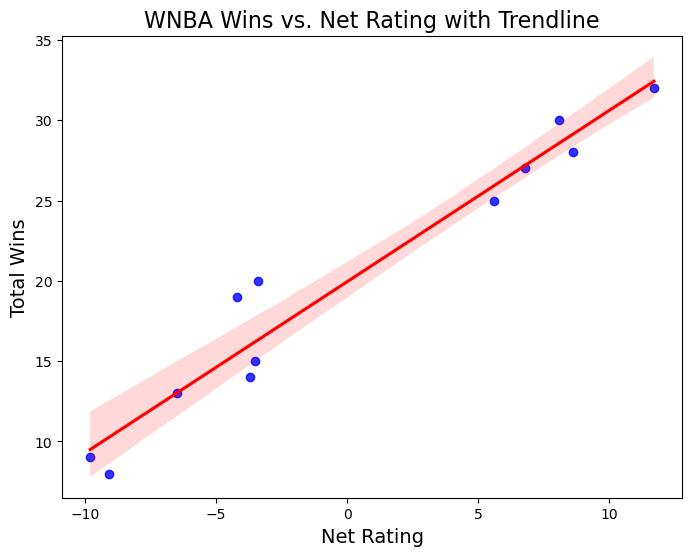

In [69]:
# Plotting data via Regression plot

plt.figure(figsize=(8, 6))

# Regression plot
sns.regplot(x="Net_Rating", y="Wins", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel("Net Rating", fontsize=14)
plt.ylabel("Total Wins", fontsize=14)
plt.title("WNBA Wins vs. Net Rating with Trendline", fontsize=16)

plt.show()

#### The data shows the higher the Net Rating (the net difference of points scored and points allowed) the more wins a team will have.

# Feature Engineering

In [30]:
# Since we already have Offensive and Defensive Ratings, we'll create Win Loss Ratio
df["Win_Loss_Ratio"] = df["Wins"] / (df["Losses"] + 1) # Avoid division by 0

In [38]:
# Checking the updated column: Win Loss Ratio
df.head()

,Rank,Team,Avg_Age,Wins,Losses,PW,PL,MOV,SOS,SRS,Off_Rating,Def_Rating,Net_Rating,Pace,FTr,3PAr,True_Shot_Per.,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Win_Loss_Ratio
0,1,New York Liberty*,28.5,32,8,33,7,9.15,-1.09,8.06,109.6,97.9,11.7,78.1,0.250,0.422,0.561,0.521,14.2,25.1,0.203,0.476,14.5,79.2,0.167,3.555556
1,2,Connecticut Sun*,28.9,28,12,31,9,6.50,-0.75,5.75,105.0,96.4,8.6,75.8,0.317,0.273,0.533,0.488,13.8,25.2,0.239,0.482,17.6,78.2,0.204,2.153846
2,3,Minnesota Lynx*,27.9,30,10,30,10,6.38,-0.74,5.64,104.6,96.5,8.1,77.7,0.230,0.371,0.553,0.518,15.3,22.3,0.182,0.460,16.5,74.2,0.181,2.727273
3,4,Las Vegas Aces*,29.6,27,13,29,11,5.48,-0.70,4.77,108.0,101.2,6.8,79.7,0.269,0.388,0.567,0.523,12.4,16.6,0.223,0.488,14.1,79.5,0.189,1.928571
4,5,Seattle Storm*,29.1,25,15,27,13,4.48,-0.56,3.92,104.2,98.6,5.6,79.4,0.252,0.295,0.525,0.478,13.5,24.2,0.211,0.477,16.5,74.6,0.210,1.562500


In [40]:
# Creating Win Percentage for y target variable
df["Win_Percentage"] = df["Wins"] / (df["Wins"] + df["Losses"] +1) 

In [41]:
# Checking Win Percentage in dataset
df.head()

,Rank,Team,Avg_Age,Wins,Losses,PW,PL,MOV,SOS,SRS,Off_Rating,Def_Rating,Net_Rating,Pace,FTr,3PAr,True_Shot_Per.,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Win_Loss_Ratio,Win_Percentage
0,1,New York Liberty*,28.5,32,8,33,7,9.15,-1.09,8.06,109.6,97.9,11.7,78.1,0.250,0.422,0.561,0.521,14.2,25.1,0.203,0.476,14.5,79.2,0.167,3.555556,0.780488
1,2,Connecticut Sun*,28.9,28,12,31,9,6.50,-0.75,5.75,105.0,96.4,8.6,75.8,0.317,0.273,0.533,0.488,13.8,25.2,0.239,0.482,17.6,78.2,0.204,2.153846,0.682927
2,3,Minnesota Lynx*,27.9,30,10,30,10,6.38,-0.74,5.64,104.6,96.5,8.1,77.7,0.230,0.371,0.553,0.518,15.3,22.3,0.182,0.460,16.5,74.2,0.181,2.727273,0.731707
3,4,Las Vegas Aces*,29.6,27,13,29,11,5.48,-0.70,4.77,108.0,101.2,6.8,79.7,0.269,0.388,0.567,0.523,12.4,16.6,0.223,0.488,14.1,79.5,0.189,1.928571,0.658537
4,5,Seattle Storm*,29.1,25,15,27,13,4.48,-0.56,3.92,104.2,98.6,5.6,79.4,0.252,0.295,0.525,0.478,13.5,24.2,0.211,0.477,16.5,74.6,0.210,1.562500,0.609756


In [45]:
# Assigning features (X) and target (y)

features = ['SRS', 'SOS', 'Off_Rating', 'Def_Rating', 'Win_Loss_Ratio']
target = "Win_Percentage"

X = df[features]
y = df[target]

# Training and Testing the Model

In [46]:
# Splitting the data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split
print("Training test size:", X_train.shape, "Testing set size:", X_test.shape)

Training test size: (9, 5) Testing set size: (3, 5)


In [47]:
# Initializing and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Making the predictions
y_pred = model.predict(X_test)

In [49]:
# Evaluating the performance of the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error: 0.0793
R2 Score: 0.8924


#### With an MAE of 0.0793 and R2 Score of 0.8924, the model has pretty strong predictive power.

In [50]:
# Predicting win percentage of teams
df.loc[:, "Predicted_Win_Percentage"] = model.predict(X)

In [51]:
# Converting win percentage to predicted wins
df.loc[:, "Predicted_Wins"] = df["Predicted_Win_Percentage"] * (df["Wins"] + df["Losses"])

In [55]:
# Sorting teams by predicted wins
df_sorted = df.sort_values(by="Predicted_Wins", ascending=False)

# Show 2025 predicted wins by team
print(df_sorted[["Team", "Predicted_Wins"]].head(12))

                  Team  Predicted_Wins
2      Minnesota Lynx*       28.117073
0    New York Liberty*       27.395122
1     Connecticut Sun*       27.209756
3      Las Vegas Aces*       25.863415
4       Seattle Storm*       25.141463
5       Indiana Fever*       18.117073
8     Phoenix Mercury*       17.619512
6       Atlanta Dream*       15.151220
9          Chicago Sky       14.517073
7   Washington Mystics       14.234146
11        Dallas Wings       11.804878
10  Los Angeles Sparks       11.658537


#### The top 5 teams from 2024 were Liberty, Sun, Lynx, Aces and Storm, respecitvely. The model predicts the top 5 teams for 2025 as Lynx, who were the runner ups in 2024, 2024 champions Liberty, Sun, Aces and Storm. All five teams are predicted to once again be in the top 5 and make playoff appeances in 2025.

# Plotting the data

In [57]:
# Defining the 12 teams as a variable
df_12 = df_sorted.head(12)

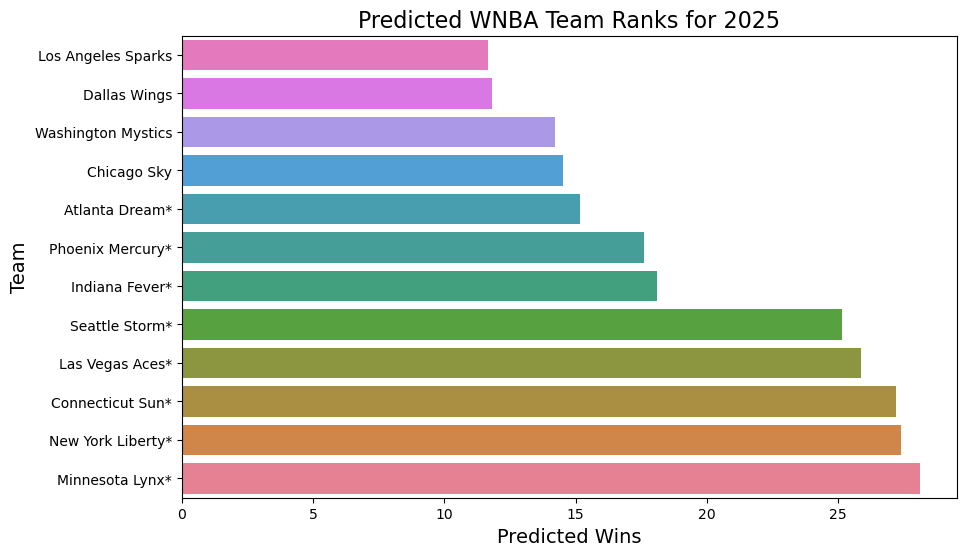

In [59]:
# Setting the style for plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x="Predicted_Wins", y="Team", data=df_12, hue="Team", legend=False)

# Adding labels and title
plt.xlabel("Predicted Wins", fontsize=14)
plt.ylabel("Team", fontsize=14)
plt.title("Predicted WNBA Team Ranks for 2025", fontsize=16)
plt.gca().invert_yaxis() # Invert y-axis so the top team is at the top

plt.show()

# Simulating the 2025 WNBA Champions

In [62]:
# Setting up the 2025 WNBA Championship Series Simulation
def simulate_series(team1, team2):
    team1_wins = 0
    team2_wins = 0
    
    while team1_wins < 4 and team2_wins < 4: # First to 4 games 
        prob_team1 = team1["Predicted_Win_Percentage"] / (
            team1["Predicted_Win_Percentage"] + team2["Predicted_Win_Percentage"]
        )
        
        if np.random.rand() < prob_team1:
            team1_wins += 1
            
        else:
            team2_wins += 1

    return team1["Team"] if team1_wins > team2_wins else team2["Team"]

# Running simulation for New York Liberty vs. Minnesota Lynx
team1 = df_sorted.iloc[0]
team2 = df_sorted.iloc[1]

series_winner = simulate_series(team1, team2)    
print(f"Predicted 2025 WNBA Champions (Best-of-7 Series): {series_winner}")

Predicted 2025 WNBA Champions (Best-of-7 Series): Minnesota Lynx*


#### In a Best-of-7 Series, the Minnesota Lynx are predicted to be the 2025 WNBA Champions!